ЛАБОРАТОРНА РОБОТА 4 

Виконав Бабич Антон

1. Загальні операції з TensorFlow:

a. Створення тензорів:

In [17]:
import tensorflow as tf

scalar = tf.constant(7)
print("Скаляр:")
print(scalar)

vector = tf.constant([10, 10])
print("Вектор:")
print(vector)

matrix = tf.constant([[1, 2], [3, 4]])
print("Матриця:")
print(matrix)

random_tensor = tf.random.Generator.from_seed(42).normal(shape=(3, 2))
print("Тензор з випадковими значеннями:")
print(random_tensor)

Скаляр:
tf.Tensor(7, shape=(), dtype=int32)
Вектор:
tf.Tensor([10 10], shape=(2,), dtype=int32)
Матриця:
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Тензор з випадковими значеннями:
tf.Tensor(
[[-0.7565803  -0.06854702]
 [ 0.07595026 -1.2573844 ]
 [-0.23193763 -1.8107855 ]], shape=(3, 2), dtype=float32)


b. Операції з тензорами:

In [4]:
a = tf.constant([1, 2])
b = tf.constant([3, 4])
print("Додавання: ", a + b)
print("Віднімання: ", a - b)

print("Множення: ", a * b)
print("Ділення: ", a / b)

c = tf.constant([1.0, -0.5])
print("Синус: ", tf.sin(c))
print("Косинус: ", tf.cos(c))

Додавання:  tf.Tensor([4 6], shape=(2,), dtype=int32)
Віднімання:  tf.Tensor([-2 -2], shape=(2,), dtype=int32)
Множення:  tf.Tensor([3 8], shape=(2,), dtype=int32)
Ділення:  tf.Tensor([0.33333333 0.5       ], shape=(2,), dtype=float64)
Синус:  tf.Tensor([ 0.84147096 -0.47942555], shape=(2,), dtype=float32)
Косинус:  tf.Tensor([0.5403023  0.87758255], shape=(2,), dtype=float32)


c. Індексація та зрізи

In [3]:
tensor = tf.constant([[1, 2], [3, 4]])
print("Перший елемент: ", tensor[0, 0])

subset = tensor[:, 1]
print("Підмножина: ", subset)

Перший елемент:  tf.Tensor(1, shape=(), dtype=int32)
Підмножина:  tf.Tensor([2 4], shape=(2,), dtype=int32)


d. Зміна форми тензорів

In [2]:
tensor = tf.range(9)
reshaped_tensor = tf.reshape(tensor, (3, 3))
print("Оригінальний тензор: ", tensor)
print("Тензор після зміни форми: ", reshaped_tensor)

Оригінальний тензор:  tf.Tensor([0 1 2 3 4 5 6 7 8], shape=(9,), dtype=int32)
Тензор після зміни форми:  tf.Tensor(
[[0 1 2]
 [3 4 5]
 [6 7 8]], shape=(3, 3), dtype=int32)


2. Глибше ознайомлення з TensorFlow:

a. Регресія:

Згенерувати синтетичний набір даних для задачі регресії, включаючи ознаки та відповідні значення цільової змінної.
Створити послідовну модель нейронної мережі з Dense шарами для регресії.
Вибрати функцію втрати та оптимізатор для навчання моделі регресії.
Навчити модель та оцінити її регресійну точність.

Epoch 1/10


32/32 - 0s - loss: 9.7954 - 479ms/epoch - 15ms/step
Epoch 2/10
32/32 - 0s - loss: 8.1452 - 50ms/epoch - 2ms/step
Epoch 3/10
32/32 - 0s - loss: 6.6955 - 47ms/epoch - 1ms/step
Epoch 4/10
32/32 - 0s - loss: 5.3660 - 50ms/epoch - 2ms/step
Epoch 5/10
32/32 - 0s - loss: 4.2200 - 100ms/epoch - 3ms/step
Epoch 6/10
32/32 - 0s - loss: 3.2312 - 58ms/epoch - 2ms/step
Epoch 7/10
32/32 - 0s - loss: 2.4726 - 67ms/epoch - 2ms/step
Epoch 8/10
32/32 - 0s - loss: 1.9182 - 56ms/epoch - 2ms/step
Epoch 9/10
32/32 - 0s - loss: 1.5557 - 50ms/epoch - 2ms/step
Epoch 10/10
32/32 - 0s - loss: 1.3448 - 50ms/epoch - 2ms/step
32/32 [==============================] - 0s 2ms/step - loss: 1.2611
Model loss: 1.2610535621643066
32/32 [==============================] - 0s 1ms/step


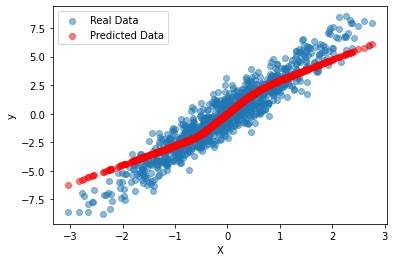

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.normal(size=(n_samples, 1))
y = 3 * X + np.random.normal(size=(n_samples, 1))

model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(1,)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X, y, epochs=10, verbose=0)

loss = model.evaluate(X, y)
print(f"Model loss: {loss}")

import matplotlib.pyplot as plt

predictions = model.predict(X)

plt.scatter(X, y, label='Real Data', alpha=0.5)
plt.scatter(X, predictions, color='red', label='Predicted Data', alpha=0.5)

plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.show()

Класифікація:

Згенерувати синтетичний набір даних для задачі бінарної класифікації, включаючи ознаки та мітки класів.
Створити послідовну модель нейронної мережі з Dense шарами для класифікації.
Вибрати функцію втрати, оптимізатор та метрики для навчання моделі класифікації.
Навчити модель та оцінити її класифікаційну точність.

7/7 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8600
Accuracy: 86.00
7/7 [==============================] - 0s 743us/step


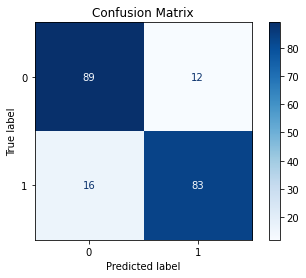

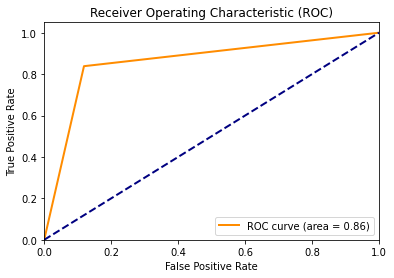

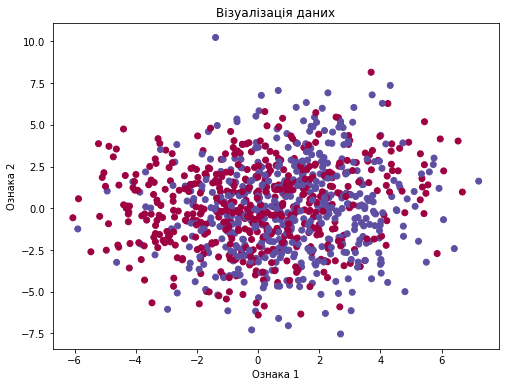

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

model = Sequential()
model.add(Dense(10, input_dim=20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, verbose=0)

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues, values_format='.0f')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve, RocCurveDisplay, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.title('Візуалізація даних')
plt.show()


Функцію втрат "binary_crossentropy" обрано тому, що це задача бінарної класифікації.
Оптимізатор 'adam' обрано тому, що він обчислювально ефективний і не вимагає багато пам'яті.
Метрику "accuracy" обрано для вимірювання ефективності моделі.